Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Data:**

In [2]:
# Load in the data
TPPI = pd.read_csv('Total_Population_Period_Indicators')

In [3]:
# Look at it
TPPI

,Unnamed: 0,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
0,0,4,Afghanistan,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.000,1.296,13.452,1.060,29.835,3821.348,4218.336,8039.684,12.315
1,1,4,Afghanistan,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.000,1.683,17.280,1.060,29.835,4176.941,4503.156,8680.097,13.295
2,2,4,Afghanistan,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.000,2.026,20.669,1.060,29.835,4636.170,4907.030,9543.200,14.618
3,3,4,Afghanistan,1965-1970,1968,7.450,2.017,51.646,2728.221,36.15,35.37,37.06,211.072,314.708,28.223,1490.896,790.745,700.151,-0.379,-20.000,2.307,23.423,1.060,29.835,5202.606,5434.458,10637.064,16.293
4,4,4,Afghanistan,1970-1975,1973,7.450,2.141,51.234,3056.451,38.74,37.92,39.67,191.642,286.630,25.495,1520.938,802.414,718.524,-0.335,-20.000,2.544,25.739,1.060,29.835,5951.120,6157.843,12108.963,18.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,7627,716,Zimbabwe,2005-2010,2008,3.885,1.512,35.220,2181.357,45.02,43.34,46.68,62.686,96.286,16.915,1047.650,521.294,526.356,-8.278,-512.676,1.003,18.305,1.020,27.877,6477.094,5902.459,12379.553,32.001
7628,7628,716,Zimbabwe,2010-2015,2013,4.090,1.761,36.445,2415.589,56.71,54.88,58.26,51.221,70.933,10.194,675.684,323.126,352.558,-9.399,-622.997,1.686,26.251,1.020,27.960,7001.157,6349.221,13350.378,34.510
7629,7629,716,Zimbabwe,2015-2020,2018,3.626,1.620,30.845,2211.423,60.83,59.16,62.22,38.740,51.246,8.074,578.844,273.627,305.217,-8.150,-584.288,1.463,22.771,1.020,28.203,7559.693,6879.119,14438.812,37.324
7630,7630,716,Zimbabwe,2020-2025,2023,3.322,1.501,27.689,2144.053,62.16,60.39,63.66,34.096,45.112,7.619,589.959,281.010,308.949,-3.959,-306.540,1.612,20.070,1.022,28.367,8136.542,7444.481,15581.023,40.277


## **Target:**

In [4]:
# I wanted to get a look at the data to see if anything called out to me as a target
TPPI.describe()

,Unnamed: 0,LocID,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
count,7632.00000,7632.000000,7632.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7632.000000,7088.000000,7088.000000,7088.000000,7.088000e+03,7.088000e+03,7.632000e+03,7632.000000
mean,3815.50000,1034.761006,1994.875000,3.831392,1.534372,27.639051,57279.246641,64.279876,62.067798,66.536494,59.517827,87.951534,11.360619,24977.727445,13181.393661,11796.333783,-0.130939,-214.672219,1.583137,16.278433,1.053711,28.810993,2.452477e+05,2.489027e+05,4.589297e+05,197.301073
std,2203.31296,722.570401,33.861994,1.897975,0.604770,12.934401,119362.543037,12.607073,12.158732,13.112974,52.344031,85.371346,5.500324,53517.256616,28209.979282,25322.540725,7.185746,2824.850320,1.350906,10.526515,0.017371,1.415274,5.437541e+05,5.560014e+05,1.067353e+06,1296.935589
min,0.00000,4.000000,1953.000000,0.850000,0.410000,5.558000,1.198000,14.490000,11.880000,18.120000,0.126000,0.231000,1.147000,1.597000,0.808000,0.681000,-70.787000,-24462.517000,-13.839000,-20.979000,1.004000,23.897000,7.923000e+00,9.321000e+00,6.850000e-01,0.060000
25%,1907.75000,446.000000,1971.750000,2.079750,0.970000,15.911750,602.718250,55.340000,53.580000,57.050000,16.031250,19.552750,7.508500,287.015000,150.790000,136.603250,-1.400000,-457.890000,0.691000,7.604750,1.050000,27.712000,2.499810e+03,2.478078e+03,3.002168e+03,17.507250
50%,3815.50000,903.000000,1990.500000,3.301000,1.457500,25.893000,5639.506000,66.565000,64.045000,69.240000,43.623500,56.928500,9.880500,2716.019000,1410.282000,1289.021000,-0.239000,-17.073000,1.597500,17.738000,1.050000,28.997000,2.588380e+04,2.529137e+04,3.396807e+04,40.265000
75%,5723.25000,1586.000000,2009.250000,5.642000,2.039000,39.644750,51853.495500,73.340000,70.500000,76.290000,93.709250,137.602000,13.356750,20751.778250,11056.459000,9867.950000,0.859250,88.075000,2.407250,25.183500,1.060000,29.703250,2.122962e+05,2.065572e+05,3.655863e+05,110.183250
max,7631.00000,5501.000000,2098.000000,8.800000,3.653000,58.263000,701277.931000,94.020000,91.140000,96.930000,319.239000,465.517000,61.634000,606048.782000,313187.571000,292861.211000,134.414000,23278.467000,20.939000,42.294000,1.173000,34.997000,5.425119e+06,5.443229e+06,1.086835e+07,42625.503000


In [5]:
# I became curious about the number of births
# From my build week I noticed that fertility declines and population rises but
# Number of births were a bit more erratic 
# My quesiton, for this assignment, becomes what sort of things affect the number of births
# Before anything I wanted to get rid of the nan, they aren't necessary 
df = TPPI.dropna(subset=['Births'])
df.isna().sum().unique()
# and removes all nan values

array([0])

# **Ridge Regression:**


## **Baseline:**


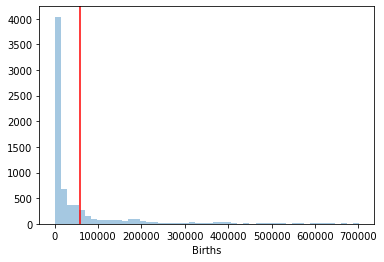

In [6]:
# It stands out that there's no categorical data in my set so I knew my problem wasn't related to classification
# I decided to go with ridge regression on a feeling that I hoped would be the right choice
sns.distplot(df['Births'], kde=False);
plt.axvline(df['Births'].mean(), color='red');

In [7]:
df.Births.describe()

count      7088.000000
mean      57279.246641
std      119362.543037
min           1.198000
25%         602.718250
50%        5639.506000
75%       51853.495500
max      701277.931000
Name: Births, dtype: float64

In [8]:
df.Births.value_counts()

184439.615    5
23638.907     5
21438.111     5
128009.532    5
102931.137    5
             ..
342.520       1
1310.475      1
2133.004      1
39760.368     1
5.750         1
Name: Births, Length: 6535, dtype: int64

In [9]:
df.Births.value_counts(normalize=True)

184439.615    0.000705
23638.907     0.000705
21438.111     0.000705
128009.532    0.000705
102931.137    0.000705
                ...   
342.520       0.000141
1310.475      0.000141
2133.004      0.000141
39760.368     0.000141
5.750         0.000141
Name: Births, Length: 6535, dtype: float64

In [10]:
baseline = round(df.Births.mean())
baselist = [baseline] * len(df.Births)
baseline

57279

In [11]:
errs = baseline - df['Births']
mae = errs.abs().mean()
print(f'The baseline is {baseline} births,')
print(f'On average, that would be off by {mae:,.0f}.')

The baseline is 57279 births,
On average, that would be off by 72,921.


In [12]:
def RM(data, pred):
  mse = mean_squared_error(y_true=data,y_pred= pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(data,pred)
  R2 = r2_score(data,pred)
  AdR2 = 1-(1-R2)*(len(data)- 1)/(len(data)- df.Births.nunique() - 1)
  print(f'Mean Squared Error: {mse:.2f}')
  print(f'Root Mean Squared Error: {rmse:.2f}')
  print(f'Mean Absolute Error: {mae:.2f}')
  print(f'R^2: {R2}')
  print(f'Adjusted R^2: {AdR2}')

In [13]:
RM(df.Births,baselist)

Mean Squared Error: 14245406604.59
Root Mean Squared Error: 119354.12
Mean Absolute Error: 72920.87
R^2: -4.270139797313277e-12
Adjusted R^2: -11.838768115996853
